## Q-3. 
### Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
- a. Measure the dispersion in both and interpret the results.
- b. Calculate mean and 5% confidence interval and plot it in a graph
- c. Calculate the Mean absolute deviation and Standard deviation and interpret  the results.
- d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.


In [3]:
import pandas as pd
import numpy as np

# Read data from CSV file
data = pd.read_csv('data.csv')

In [10]:
## a.
# Assuming the correct column names are identified
bp_before = data[' Blood Pressure Before (mmHg)']
bp_after = data[' Blood Pressure After (mmHg)']

# Dispersion measures 
range_before = np.max(bp_before) - np.min(bp_before)
range_after = np.max(bp_after) - np.min(bp_after)

variance_before = np.var(bp_before)
variance_after = np.var(bp_after)

std_dev_before = np.std(bp_before)
std_dev_after = np.std(bp_after)

# results 

print("Dispersion Measures : \n")
print("*************************\n")
print("Before - Range : {:.2f}".format(range_before))
print("Before - Variance : {:.2f}".format(variance_before))
print("Before - Standard Deviation : {:.2f}".format(std_dev_before))

print("After - Range:{:.2f}".format(range_after))
print("After - Variance : {:.2f}".format(variance_after))
print("After - Standard Deviation : {:.2f}".format(std_dev_after))

Dispersion Measures : 

*************************

Before - Range : 28.00
Before - Variance : 43.10
Before - Standard Deviation : 6.57
After - Range:23.00
After - Variance : 46.97
After - Standard Deviation : 6.85


mean before : 133.91
mean after : 128.36
confidence interval before : (132.62324371404807, 135.19675628595192)
confidence interval after : (127.01673957330856, 129.70326042669146)


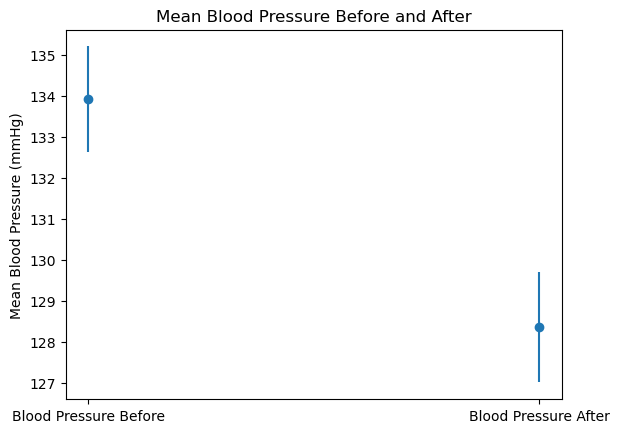

In [15]:
#b
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate mean and confidence interval
mean_before = np.mean(bp_before)
mean_after = np.mean(bp_after)

print("mean before : {}".format(mean_before))
print("mean after : {}".format(mean_after))

conf_int_before = stats.norm.interval(0.95,loc = mean_before, scale = std_dev_before / np.sqrt(len(bp_before)))
conf_int_after = stats.norm.interval(0.95,loc = mean_after, scale = std_dev_after / np.sqrt(len(bp_after)))

print("confidence interval before : {}".format(conf_int_before))
print("confidence interval after : {}".format(conf_int_after))

# Plotting the means and confidence intervals
means = [mean_before,mean_after]
labels = ["Blood Pressure Before","Blood Pressure After"]
confidence_intervals = [conf_int_before,conf_int_after]

plt.errorbar(labels,means,yerr=[(ci[1] - mean) for ci, mean in zip(confidence_intervals,means)],fmt='o')
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.title('Mean Blood Pressure Before and After')
plt.show()

In [16]:
#c

# Calculate Mean Absolute Deviation (MAD)
mad_before = np.mean(np.abs(bp_before - mean_before))
mad_after = np.mean(np.abs(bp_after - mean_after))

print("Mean Absolute Deviation:")
print("Before: {:.2f}".format(mad_before))
print("After: {:.2f}".format(mad_after))
print()
print("Standard Deviation:")
print("Before: {:.2f}".format(std_dev_before))
print("After: {:.2f}".format(std_dev_after))


Mean Absolute Deviation:
Before: 5.71
After: 5.90

Standard Deviation:
Before: 6.57
After: 6.85


In [17]:
## d.

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(bp_before, bp_after)[0, 1]
correlation_coefficient

0.9779485966556021

In [18]:
# Check significance at the 1% level of significance
n = len(bp_before)
t_critical = stats.t.ppf(0.995, df=n - 2)
standard_error = np.sqrt((1 - correlation_coefficient ** 2) / (n - 2))
t_score = correlation_coefficient / standard_error

# Interpretation of results
print("Correlation Coefficient: {:.4f}".format(correlation_coefficient))
print("t-score: {:.4f}".format(t_score))
print("t-critical (1% level of significance): {:.4f}".format(t_critical))
print("Significance at 1% level: ", "Significant" if np.abs(t_score) > t_critical else "Not Significant")

#Correlation Coefficient : close to 1 --- strong positive correlation, 
                          #close to -1 --- strong negative correlation, 
                          #close to 0 --- weak or no correlation.
#t-score : standard errors the correlation coefficient is away from zero. 
          #It is compared to the t-critical value  
          #At the 1% level of significance, if the t-score exceeds the t-critical value, 
          #the correlation is considered statistically significant.
#Significance : t-score > t-critical
                #there is a significant linear relationship between the 'Blood Pressure Before' and 'Blood Pressure After'.

Correlation Coefficient: 0.9779
t-score: 46.3557
t-critical (1% level of significance): 2.6269
Significance at 1% level:  Significant
